In [63]:
!pwd

/home/wsuser/work


Import the libraries and load the dataset

In [64]:
!pip install keras tensorflow

In [65]:
import keras
import datetime
import tensorflow as tf # open source used for both ML and DL for computation
import numpy as np
from keras.datasets import mnist # mnist dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Load  the dataset

In [66]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

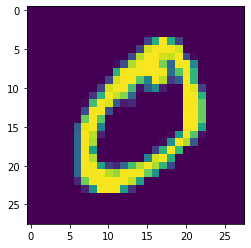

0


In [67]:
plt.imshow(x_train[1])
plt.show()
print(y_train[1])

In [68]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


Preprocess the data

In [69]:
# reshape the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [70]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [71]:
#convert class vectors to binary class matrices(One hot label)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Create the model

In [72]:
batch_size = 128
num_classes = 10
epochs = 3

# model creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


Compile the model

In [73]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


Train the model

In [74]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/3
469/469 [==============================] - 98s 209ms/step - loss: 0.2040 - accuracy: 0.9372 - val_loss: 0.0533 - val_accuracy: 0.9828
Epoch 2/3
469/469 [==============================] - 97s 207ms/step - loss: 0.0674 - accuracy: 0.9800 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 3/3
469/469 [==============================] - 95s 202ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0287 - val_accuracy: 0.9900
The model has successfully trained


Save the model

In [75]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [76]:
!tar -zcvf hand-written-model.tgz mnist.h5

mnist.h5


In [77]:
!ls

hand-written-model.tgz	IBM-model.tgz  mnist.h5


In [78]:
pip install watson-machine-learning-client --upgrade

Note: you may need to restart the kernel to use updated packages.


In [79]:
from ibm_watson_machine_learning import APIClient
credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"kwf7FqmJHr4vZ8WbezH5QHYKZRILa6GxtTs07lgbx8tk"
}
client=APIClient(credentials)

In [80]:
def guid_from_space_name(client, space_name):
        space=client.spaces.get_details()
        return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [81]:
space_uid = guid_from_space_name(client, 'handdigitrecognition')
space_uid

'130c9065-9850-4e43-bca7-bbd5fc8a09d3'

In [82]:
client.set.default_space(space_uid)

'SUCCESS'

In [83]:
client.software_specifications.list(limit=300)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [84]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [85]:
model_details = client.repository.store_model(model="hand-written-model.tgz", meta_props={
client.repository.ModelMetaNames.NAME: "CNN",
client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

In [86]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T17:22:30.744Z',
  'id': 'b57b700b-166a-4f4a-b9f2-df33517a3986',
  'modified_at': '2022-11-17T17:22:34.503Z',
  'name': 'CNN',
  'owner': 'IBMid-665000VRPC',
  'resource_key': 'a811f6ae-b806-491d-a2c7-598cc3470853',
  'space_id': '130c9065-9850-4e43-bca7-bbd5fc8a09d3'},
 'system': {'warnings': []}}

In [87]:
model_id = client.repository.get_model_id(model_details)
model_id

'b57b700b-166a-4f4a-b9f2-df33517a3986'

In [89]:
client.repository.download(model_id,'IBM-model1.tgz')

Successfully saved model content to file: 'IBM-model1.tgz'


'/home/wsuser/work/IBM-model1.tgz'

In [90]:
ls

hand-written-model.tgz  IBM-model1.tgz  IBM-model.tgz  mnist.h5


In [91]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [92]:
model = load_model("mnist.h5")

In [93]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='U2YMBAH8OH6HBEUbuDvoWa1hufcfGnZgtZ-xZ_ZYyQ8H',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognizer-donotdelete-pr-xao5huttgqcykg'
object_key = 'download.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [94]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [95]:
img

In [96]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [97]:
pred = model.predict(im2arr)
print(pred)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [98]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
